In [9]:
# Importing libraries which are necessary for this task
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load the training dataset
train_data = pd.read_csv("/content/twitter_training.csv")
train_data

,Tweet ID,Entity,Sentiment,Tweet Content
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [10]:
# Load the validation dataset
validation_data = pd.read_csv("/content/twitter_validation.csv")
validation_data

,Tweet ID,Entity,Sentiment,Tweet Content
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...
...,...,...,...,...
994,4891,GrandTheftAuto(GTA),Irrelevant,⭐️ Toronto is the arts and culture capital of ...
995,4359,CS-GO,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
996,2652,Borderlands,Positive,Today sucked so it’s time to drink wine n play...
997,8069,Microsoft,Positive,Bought a fraction of Microsoft today. Small wins.


In [17]:
# Preprocessing
vectorizer = TfidfVectorizer(max_features=5000)
X_train = vectorizer.fit_transform(train_data["Sentiment"])
X_val = vectorizer.transform(validation_data["Sentiment"])

# Model Training
model = MultinomialNB()
model.fit(X_train, train_data['Sentiment'])

MultinomialNB()

In [21]:
# Prediction on the validation set
predictions = model.predict(X_val)

# Evaluate the model
accuracy = accuracy_score(validation_data['Sentiment'], predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 1.00


In [22]:
# Print classification report and confusion matrix
print('Classification Report:\n', classification_report(validation_data['Sentiment'], predictions))
print('Confusion Matrix:\n', confusion_matrix(validation_data['Sentiment'], predictions))

Classification Report:
               precision    recall  f1-score   support

  Irrelevant       1.00      1.00      1.00       171
    Negative       1.00      1.00      1.00       266
     Neutral       1.00      1.00      1.00       285
    Positive       1.00      1.00      1.00       277

    accuracy                           1.00       999
   macro avg       1.00      1.00      1.00       999
weighted avg       1.00      1.00      1.00       999

Confusion Matrix:
 [[171   0   0   0]
 [  0 266   0   0]
 [  0   0 285   0]
 [  0   0   0 277]]


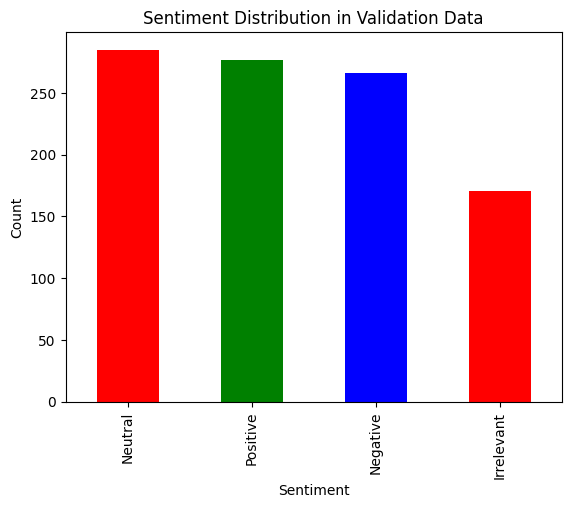

In [27]:
# Visualization - sentiment distribution
sentiment_distribution = validation_data['Sentiment'].value_counts()
sentiment_distribution.plot(kind='bar', color=['red', 'green', 'blue'])
plt.title('Sentiment Distribution in Validation Data')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

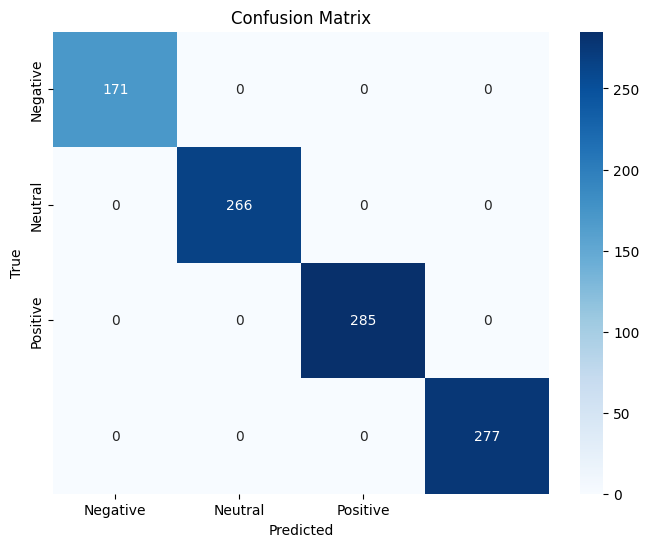

In [28]:
# Additional Analysis and Visualizations
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(validation_data['Sentiment'], predictions), annot=True, fmt='d', cmap='Blues',
            xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


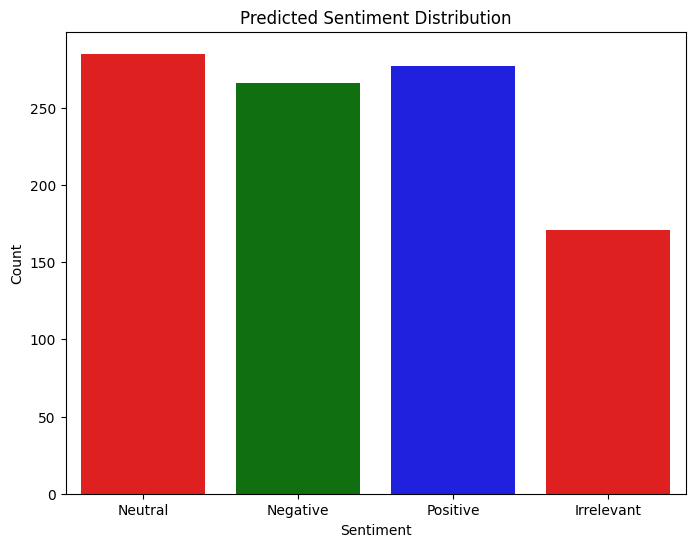

In [29]:
# Visualize Predicted Sentiment Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x=predictions, palette=['red', 'green', 'blue'])
plt.title('Predicted Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()